

# Mirpy example script snippets  

*Mel J. Rose, Joe Callingham*
<br>
ASTRON
2017-06-06 


This project uses MIRIAD, a radio interferometry data reduction package downloaded from http://www.atnf.csiro.au/computing/software/miriad/

Note that there is another code base of MIRIAD (http://www.astro.umd.edu/~teuben/miriad/intro.html) that is "nontrivially divergent" 

At the time of writing, I found two python packages that interfaced with MIRIAD: 

(1) mirpy (which seems to be written for the CSIRO code base) and

(2) miriad-python, which is written only for the CARMA/UMD version (Williams et al., 2012 PASP 124 624 doi:10.1086/666604). I tried to install miriad-python with the csiro version anyway, and got the error 
"checking for miriad.h... no
configure: error: Couldn't find Miriad headers." So... we use mirpy here.

I just used pip install mirpy and everything seemed to work. Later on I had to convert mirpy to be compatible with Python3.

This notebook follows the tutorials by Jamie Stevens (http://www.atnf.csiro.au/computing/software/miriad/tutorials.html)



In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.display import display
import numpy as np
import os
import glob
from mirpy import miriad 
# note: mirpy is a python2 module that I futurized
# so I could use it in python3

In [3]:
# let's see what this module is all about
#help(miriad)

Mirpy seems to be a scripting interface and not really for manual 
 browsing of miriad commands or data. Having a terminal running 
alongside this notebook helped when I didn't know what the parameters
 were for certain tasks (i.e. I could run 'inp atlod' and the like)

# Basic CABB Continuum Data Reduction with Miriad

## Load and trim the data

In [4]:
# checking the contents of the directory we're in 
cwd = os.getcwd()
print(glob.glob('*'))

['1934-638.2100', '1934-638.2100.png', '1934-638.2100.png_2', '1934-638.2100realimag.png', '2011-04-28_1858.CX208', '2051-377.1332', '2051-377.1844', '2051-377.2100', '2051-377.2356', '2051-377.2868', '2051-377.2868.ibeam', '2051-377.2868.imap', '2051-377.2868.imap.png', '2051-377.2868.imodel', '2051-377.2868.iresidual', '2051-377.2868.iresidual.png', '2051-377.2868.irestor', '2051-377.2868.mf.ibeam', '2051-377.2868.mf.imap', '2051-377.uvaver.2100', '2058-425.2100', 'cx208_2011-04-28.uv', 'imhist_2051-377.2868.iresidual.png', 'Miriad_tutorial.ipynb']


In [5]:
# load in the tutorial data 

# atlod parameters
in_ = "2011-04-28_1858.CX208"
out= "cx208_2011-04-28.uv/"
ifsel=1
options = 'birdie,rfiflag,noauto,xycorr'

# remove uvdata if it already exists
!rm -r $out

# store miriad output in variable in case you want to parse it
mir_output = miriad.atlod(in_=in_, out=out, ifsel=ifsel, options=options)

# but let's take a look at it
print(mir_output.decode("utf-8"))

atlod: Revision 1.53, 2016/08/25 23:02:21 UTC

Processing file 2011-04-28_1858.CX208
 18:58:50 CAOBS> track 1
CABB data detected
Scan 1 started at 11APR28:18:59:14.9
Source: 1934-638
Flagging channels in  28 frequency ranges
 19:04:11 CAOBS> stop
 19:04:17 CAOBS> set file ste616_cx208
 19:04:20 CAOBS> start 1/100
Scan 2 started at 11APR28:19:12:24.9
Source: 2058-425
Scan 3 started at 11APR28:19:13:54.9
Source: 2051-377
Scan 4 started at 11APR28:19:24:24.9
Source: 2058-425
Scan 5 started at 11APR28:19:25:54.9
Source: 2051-377
Scan 6 started at 11APR28:19:36:24.9
Source: 2058-425
Scan 7 started at 11APR28:19:37:54.9
Source: 2051-377
Scan 8 started at 11APR28:19:48:24.9
Source: 2058-425
Scan 9 started at 11APR28:19:49:54.9
Source: 2051-377
Scan 10 started at 11APR28:20:00:24.9
Source: 2058-425
Scan 11 started at 11APR28:20:01:54.9
Source: 2051-377
RPFITS file version is 2.12
---------------------------------------
Total number of spectra selected: 24000

Summary of spectra flagged
Flaggin

/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'atlod':  I/O error occurred with jstat=5. Look for next header
  warnings.warn(msg)


In [6]:
# flag the edge channels that are within the bandpass rollof

# uvflag parameters
vis = "cx208_2011-04-28.uv/"
edge = 40
flagval = "flag"

mir_output = miriad.uvflag(vis=vis, edge=edge, flagval=flagval)
print(mir_output.decode("utf-8"))

uvflag: Revision 1.8, 2014/09/30 14:23:39 UTC


Set flags to indicate bad data in visibility file cx208_2011-04-28.uv/
Linetype channel; select all channels
Set flags for the first 40 and the last 40 channels of each window

Overview of flagging on visibility file cx208_2011-04-28.uv/
Changed flags set to FALSE (data flagged as bad)
Total number of records selected: 20700; out of 20700 records
Antennas used: 1-6
Counts of correlations within selected channels
channel   Originally    Currently
Good:        29000700.    29000700.    Changed to bad:           0.
Bad:         13413600.    13413600.


In [8]:
# split the dataset into its component sources:

# uvsplit parameters
vis = "cx208_2011-04-28.uv/"

# remove vis if it already exists
!rm -r *.2100

mir_output = miriad.uvsplit(vis=vis)
print(mir_output.decode("utf-8"))

uvsplit: Revision 1.18, 2016/05/09 03:06:18 UTC

Creating 1934-638.2100
Creating 2058-425.2100
Creating 2051-377.2100


In [9]:
bandflux_cal = '1934-638.2100'
phase_cal ="2058-425.2100"
source = "2051-377.2100"

## Initial Calibration

In [10]:
# get an idea of what the data looks like before calibration

# uvspec parameters
vis = bandflux_cal
stokes = "xx,yy"
axis = "chan,amp"
device="/xs" # can do devices like /xs, /png, /null, or others listed on the link:
            # (http://www.atnf.csiro.au/computing/software/miriad/userguide/node25.html)
            # note: you have to close xs before the cell stops hanging
mir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,
                            device=device)

In [11]:
# I tried to use device="/png" and display a quick gif of the output in the notebook,
# but it didn't really work :(
# it's probably better to just go through miriad for examining files 

'''
if device=="/png":
    import imageio
    from natsort import natsorted
    
    
    # rename the weird png files
    files = !ls *png*
    skipfirst = True
    for f in files:
        if not skipfirst:
            newname = 'pgplot{0}.png'.format(f.split('_')[-1])
            !mv $f $newname
        skipfirst = False
        
    # put them in a good order to flip through
    image_list = natsorted(glob.glob('*png*'))
    
    # make the gif from the seperate images
    with imageio.get_writer('pgplot_movie.gif', mode='I', 
                            duration=0.5, palettesize=256) as writer:
        for filename in image_list:
            img = imageio.imread(filename, format='png')
            writer.append_data(img)
            
    # display the gif      
    display(Image(url='./pgplot_movie.gif'))
'''

'\nif device=="/png":\n    import imageio\n    from natsort import natsorted\n    \n    \n    # rename the weird png files\n    files = !ls *png*\n    skipfirst = True\n    for f in files:\n        if not skipfirst:\n            newname = \'pgplot{0}.png\'.format(f.split(\'_\')[-1])\n            !mv $f $newname\n        skipfirst = False\n        \n    # put them in a good order to flip through\n    image_list = natsorted(glob.glob(\'*png*\'))\n    \n    # make the gif from the seperate images\n    with imageio.get_writer(\'pgplot_movie.gif\', mode=\'I\', \n                            duration=0.5, palettesize=256) as writer:\n        for filename in image_list:\n            img = imageio.imread(filename, format=\'png\')\n            writer.append_data(img)\n            \n    # display the gif      \n    display(Image(url=\'./pgplot_movie.gif\'))\n'

In [12]:
# determine the bandpass shape

# mfcal parameters
vis = bandflux_cal

mir_output = miriad.mfcal(vis=vis)
print(mir_output.decode("utf-8"))

MfCal: $Revision: 1.20 $, $Date: 2017/05/08 02:31:10 $
Selecting parallel-hand polarisations
Reading the data ...
Number correlations accepted: 1218870
Number of frequency bands/settings: 1
Number of polarisations selected: 2
Number of solution intervals: 1
Number of passband solution intervals: 1
Initialising ...
Using post-Aug94 ATCA flux scale for 1934-638.
Using known frequency variation of 1934-638
Generating initial solution estimate ...
Doing solution refinement ...
Iter= 1, Solution Error:  0.731
Iter= 2, Solution Error:  0.000
Saving solution ...


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'mfcal':  Correlations flagged or edge-rejected: 563760
  warnings.warn(msg)


In [13]:
# if you want to see what it looks like after mfcal

# uvspec parameters
vis = bandflux_cal
stokes = "xx,yy"
axis = "chan,amp"
device="/xs" 
mir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,
                            device=device)

## RFI Flagging

In [14]:
# automatic flagging

# pgflag parameters
vis = bandflux_cal
stokes = "xx,yy"
command = "<b"
device="/xs" 
mir_output = miriad.pgflag(vis=vis,stokes=stokes,command=command,
                            device=device)
print(mir_output.decode("utf-8"))

pgflag: Revision 1.30, 2016/10/05 23:06:50 UTC

Applying bandpass corrections to 1934-638.2100
Applying gain corrections to 1934-638.2100
Do SumThreshold operation on baseline   1   2
 31.9% of the data on this baseline is now flagged
 32.2% of the data on this baseline is now flagged
 33.1% of the data on this baseline is now flagged
Blow away the dust...
 33.2% of the data on this baseline is now flagged
Do SumThreshold operation on baseline   1   3
 31.9% of the data on this baseline is now flagged
 32.1% of the data on this baseline is now flagged
 35.7% of the data on this baseline is now flagged
Blow away the dust...
 36.8% of the data on this baseline is now flagged
Do SumThreshold operation on baseline   2   3
 31.9% of the data on this baseline is now flagged
 32.1% of the data on this baseline is now flagged
 34.6% of the data on this baseline is now flagged
Blow away the dust...
 35.1% of the data on this baseline is now flagged
Do SumThreshold operation on baseline   1   4


In [15]:
# if you want to see what it looks like after pgflag

# uvspec parameters
vis = bandflux_cal
stokes = "xx,yy"
axis = "chan,amp"
device="/xs"
mir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,
                            device=device)

In [16]:
# flag visibilities by hand

# blflag parameters
vis = bandflux_cal
device="/xs" 
stokes = "xx,yy"
axis = "chan,amp"
options="nofqav,nobase"
mir_output = miriad.blflag(vis=vis,device=device,stokes=stokes,
                           axis=axis,options=options)
print(mir_output.decode("utf-8"))

blflag: Revision 1.22, 2015/12/04 03:07:29 UTC

Applying bandpass corrections to 1934-638.2100
Applying gain corrections to 1934-638.2100
Reading the data...
Number of points to edit: 594512
Entering interactive mode...
Define a region - exit with x
Define a region - exit with x
Applying the flagging...
Total number of correlations:   3565260
Number of correlations flagged: 6816


## Gain Calibration

In [17]:
# gain calibration over time

# gpcal parameters
vis = bandflux_cal
interval="0.1"
nfbin="4"
options="xyvary"

mir_output = miriad.gpcal(vis=vis,interval=interval,nfbin=nfbin,
                           options=options)
print(mir_output.decode("utf-8"))

gpcal: Revision 1.22, 2016/05/01 22:31:05 UTC

Applying bandpass corrections to 1934-638.2100
Number of antennae: 6
Reading the data ...
Number of solution intervals: 29
Total visibilities read: 435
Number visibilities accepted: 435
Using post-Aug94 ATCA flux scale for 1934-638.
Using IQUV = 12.4868,  0.0000,  0.0000,  0.0000 at   2.1235 GHz.
Using post-Aug94 ATCA flux scale for 1934-638.
Using IQUV = 10.0443,  0.0000,  0.0000,  0.0000 at   2.8294 GHz.
Using post-Aug94 ATCA flux scale for 1934-638.
Using IQUV = 11.5389,  0.0000,  0.0000,  0.0000 at   2.3819 GHz.
Using post-Aug94 ATCA flux scale for 1934-638.
Using IQUV = 13.4704,  0.0000,  0.0000,  0.0000 at   1.8605 GHz.
Using post-Aug94 ATCA flux scale for 1934-638.
Using IQUV = 14.8988,  0.0000,  0.0000,  0.0000 at   1.4043 GHz.
Iter= 1, Amplit/Phase Solution Error:   0.077
Iter= 1, Polarisation Solution Error:   0.038
Iter= 1, Overall Solution Error:        0.382
Iter= 2, Amplit/Phase Solution Error:   0.002
Iter= 2, Polarisation S

In [18]:
# look at the amplitude vs time

# uvplt
vis = bandflux_cal
stokes = "xx,yy"
axis = "time,amp"
options="nofqav"
device="{0}timeamp.png/png".format(vis)


mir_output = miriad.uvplt(vis=vis,stokes=stokes,axis=axis,
                          options=options,device=device)
print(mir_output.decode("utf-8"))

uvplot_list = glob.glob('{0}timeamp*png*'.format(vis))
for plot in uvplot_list:
    display(Image(url=plot))

uvplt: Revision 1.18, 2014/05/21 04:34:59 UTC

Will plot unflagged data

Applying bandpass corrections to 1934-638.2100
Applying freq. dependent gain corrections to 1934-638.2100
Applying freq. dependent leakage correction to 1934-638.2100


File # 1  = 1934-638.2100
1934-638.2100 2.1000 GHz
Read 870 visibilities from all files

Baseline 1-2, plot 79134 points
Baseline 1-3, plot 74392 points
Baseline 2-3, plot 76922 points
Baseline 1-4, plot 79990 points
Baseline 2-4, plot 80568 points
Baseline 3-4, plot 77470 points
Baseline 1-5, plot 80264 points
Baseline 2-5, plot 80262 points
Baseline 3-5, plot 77750 points
Baseline 4-5, plot 79282 points
Baseline 1-6, plot 78882 points
Baseline 2-6, plot 80548 points
Baseline 3-6, plot 78698 points
Baseline 4-6, plot 80732 points
Baseline 5-6, plot 80722 points


In [19]:
# look at the  phase vs time

# uvplt parameters
vis = bandflux_cal
stokes = "xx,yy"
axis = "real,imag"
options="nofqav,nobase,equal"
device="{0}realimag.png/png".format(vis)

mir_output = miriad.uvplt(vis=vis,stokes=stokes,axis=axis,
                          options=options,device=device)
print(mir_output.decode("utf-8"))

uvplot_list = glob.glob('{0}realimag*png*'.format(vis))
for plot in uvplot_list:
    display(Image(url=plot))

uvplt: Revision 1.18, 2014/05/21 04:34:59 UTC

Will plot unflagged data

Applying bandpass corrections to 1934-638.2100
Applying freq. dependent gain corrections to 1934-638.2100
Applying freq. dependent leakage correction to 1934-638.2100


File # 1  = 1934-638.2100
1934-638.2100 2.1000 GHz
Read 870 visibilities from all files

Plot 1185616 points


In [20]:
# copy over the calibration solution

# gpcopy parameters
vis = bandflux_cal
out = phase_cal
mir_output = miriad.gpcopy(vis=vis,out=out)
print(mir_output.decode("utf-8"))

gpcopy: Revision 1.13, 2015/10/29 01:31:39 UTC

Copying leakage table
Copying gain table
Interpolation tolerance set to (minutes): 720.00
Copying bandpass table


In [21]:
# now the same process for 2058-425

# pgflag parameters
vis = phase_cal
stokes = "xx,yy"
command = "<b"
device="/xs" 
mir_output = miriad.pgflag(vis=vis,stokes=stokes,command=command,
                            device=device)
print(mir_output.decode("utf-8"))

'''
# if you want to see what it looks like after pgflag
# uvspec
vis = "2058-425.2100/"
stokes = "xx,yy"
axis = "chan,amp"
device="/xs" 
mir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,
                            device=device)
'''


pgflag: Revision 1.30, 2016/10/05 23:06:50 UTC

Applying bandpass corrections to 2058-425.2100
Applying freq. dependent gain corrections to 2058-425.2100
Applying freq. dependent leakage correction to 2058-425.2100
Do SumThreshold operation on baseline   1   2
 31.8% of the data on this baseline is now flagged
 32.0% of the data on this baseline is now flagged
 32.4% of the data on this baseline is now flagged
Blow away the dust...
 32.5% of the data on this baseline is now flagged
Do SumThreshold operation on baseline   1   3
 31.8% of the data on this baseline is now flagged
 32.1% of the data on this baseline is now flagged
 32.6% of the data on this baseline is now flagged
Blow away the dust...
 32.6% of the data on this baseline is now flagged
Do SumThreshold operation on baseline   2   3
 31.8% of the data on this baseline is now flagged
 31.9% of the data on this baseline is now flagged
 32.3% of the data on this baseline is now flagged
Blow away the dust...
 32.3% of the data o

'\n# if you want to see what it looks like after pgflag\n# uvspec\nvis = "2058-425.2100/"\nstokes = "xx,yy"\naxis = "chan,amp"\ndevice="/xs" \nmir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,\n                            device=device)\n'

In [22]:
# manual visability flagging for 2058-425

# blflag parameters
vis = phase_cal
device="/xs" 
stokes = "xx,yy"
axis = "chan,amp"
options="nofqav,nobase"
mir_output = miriad.blflag(vis=vis,device=device,stokes=stokes,
                           axis=axis,options=options)
print(mir_output.decode("utf-8"))

'''
# if you want to see what it looks like after blflag
# uvspec
vis = "2058-425.2100/"
stokes = "xx,yy"
axis = "chan,amp"
device="/xs" 
mir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,
                            device=device)
'''

blflag: Revision 1.22, 2015/12/04 03:07:29 UTC

Applying bandpass corrections to 2058-425.2100
Applying freq. dependent gain corrections to 2058-425.2100
Applying freq. dependent leakage correction to 2058-425.2100
Reading the data...
Number of points to edit: 625916
Entering interactive mode...
Define a region - exit with x
Define a region - exit with x
Applying the flagging...
Total number of correlations:   3688200
Number of correlations flagged: 4868


'\n# if you want to see what it looks like after blflag\n# uvspec\nvis = "2058-425.2100/"\nstokes = "xx,yy"\naxis = "chan,amp"\ndevice="/xs" \nmir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,\n                            device=device)\n'

In [23]:
# after you're done with RFI flagging for 2058-425
# calibrate the visibilities

# gpcal parameters
vis = phase_cal
interval="0.1"
nfbin="4"
options="xyvary,qusolve"

mir_output = miriad.gpcal(vis=vis,interval=interval,nfbin=nfbin,
                           options=options)
print(mir_output.decode("utf-8"))

gpcal: Revision 1.22, 2016/05/01 22:31:05 UTC

Applying bandpass corrections to 2058-425.2100
Number of antennae: 6
Using leakage parameters from input as initial guess
Reading the data ...
Number of solution intervals: 30
Total visibilities read: 450
Number visibilities accepted: 450
Iter= 1, Amplit/Phase Solution Error:   0.453
Iter= 1, Polarisation Solution Error:   0.003
Iter= 1, Overall Solution Error:        1.666
Iter= 2, Amplit/Phase Solution Error:   0.002
Iter= 2, Polarisation Solution Error:   0.000
Iter= 2, Overall Solution Error:        0.003
Iter= 3, Amplit/Phase Solution Error:   0.000
Iter= 3, Polarisation Solution Error:   0.000
Iter= 3, Overall Solution Error:        0.000
I flux density:   1.0923
Percent Q:   0.036
Percent U:   0.267
Leakage terms:
 Ant 1:Dx,Dy = ( 0.01567, 0.00244),(-0.01848, 0.00212)
 Ant 2:Dx,Dy = ( 0.01974,-0.00318),(-0.02318,-0.00410)
 Ant 3:Dx,Dy = (-0.01713, 0.00080),( 0.01477,-0.00095)
 Ant 4:Dx,Dy = (-0.01583, 0.00687),( 0.01602, 0.00010)
 A

In [24]:
# check on your RFI flagging

# uvplt parameters
vis = phase_cal
stokes = "xx,yy"
axis = "real,imag"
options="nofqav,nobase,equal"
device="{0}realimag.png/png".format(vis)

mir_output = miriad.uvplt(vis=vis,stokes=stokes,axis=axis,
                          options=options,device=device)
print(mir_output.decode("utf-8"))

uvplot_list = glob.glob('{0}realimag*png*'.format(vis))
for plot in uvplot_list:
    display(Image(url=plot))

uvplt: Revision 1.18, 2014/05/21 04:34:59 UTC

Will plot unflagged data

Applying bandpass corrections to 2058-425.2100
Applying freq. dependent gain corrections to 2058-425.2100
Applying freq. dependent leakage correction to 2058-425.2100


File # 1  = 2058-425.2100
2058-425.2100 2.1000 GHz
Read 900 visibilities from all files

Plot 1249398 points


In [25]:
# reestablish flux

# gpboot parameters
vis = phase_cal
cal = bandflux_cal

mir_output = miriad.gpboot(vis=vis,cal=cal)
print(mir_output.decode("utf-8"))

gpboot: Revision 1.9, 2015/10/29 01:31:30 UTC

Secondary flux density scaled by:   0.989
Frequency bin  1 scaled by      :   0.971
Frequency bin  2 scaled by      :   0.972
Frequency bin  3 scaled by      :   0.974
Frequency bin  4 scaled by      :   0.972


## Image preparation

In [26]:
# copy calibration tables from phase calibrator to source to be imaged

# gpcopy parameters
vis = phase_cal
out = source

mir_output = miriad.gpcopy(vis=vis,out=out)
print(mir_output.decode("utf-8"))

gpcopy: Revision 1.13, 2015/10/29 01:31:39 UTC

Copying leakage table
Copying gain table
Interpolation tolerance set to (minutes): 720.00
Copying bandpass table


In [27]:
# average/smoothe antenna gains

# gpaver parameters
vis = source
interval = "2"

mir_output = miriad.gpaver(vis=vis,interval=interval)
print(mir_output.decode("utf-8"))

gpaver: Revision 1.4, 2015/10/29 01:31:20 UTC


In [28]:
# use pgflag and blflag to flag this data as well


# pgflag parameters
vis = source
stokes = "xx,yy"
command = "<b"
device="/xs" 
mir_output = miriad.pgflag(vis=vis,stokes=stokes,command=command,
                            device=device)
print(mir_output.decode("utf-8"))

'''
# if you want to see what it looks like after pgflag
# uvspec
vis = "2051-377.2100"
stokes = "xx,yy"
axis = "chan,amp"
device="/xw 
mir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,
                            device=device)
'''



pgflag: Revision 1.30, 2016/10/05 23:06:50 UTC

Applying bandpass corrections to 2051-377.2100
Applying freq. dependent gain corrections to 2051-377.2100
Applying freq. dependent leakage correction to 2051-377.2100
Do SumThreshold operation on baseline   1   2
 31.8% of the data on this baseline is now flagged
 32.1% of the data on this baseline is now flagged
 32.5% of the data on this baseline is now flagged
Blow away the dust...
 32.6% of the data on this baseline is now flagged
Do SumThreshold operation on baseline   1   3
 31.9% of the data on this baseline is now flagged
 32.3% of the data on this baseline is now flagged
 32.6% of the data on this baseline is now flagged
Blow away the dust...
 32.7% of the data on this baseline is now flagged
Do SumThreshold operation on baseline   2   3
 31.8% of the data on this baseline is now flagged
 32.1% of the data on this baseline is now flagged
 32.5% of the data on this baseline is now flagged
Blow away the dust...
 32.5% of the data o

'\n# if you want to see what it looks like after pgflag\n# uvspec\nvis = "2051-377.2100"\nstokes = "xx,yy"\naxis = "chan,amp"\ndevice="/xw \nmir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,\n                            device=device)\n'

In [29]:


# blflag parameters
vis = source
device="/xs" 
stokes = "xx,yy"
axis = "chan,amp"
options="nofqav,nobase"
mir_output = miriad.blflag(vis=vis,device=device,stokes=stokes,
                           axis=axis,options=options)
print(mir_output.decode("utf-8"))

'''
# if you want to see what it looks like after blflag
# uvspec
vis = "2051-377.2100/"
stokes = "xx,yy"
axis = "chan,amp"
device="/xs" 
mir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,
                            device=device)
'''

blflag: Revision 1.22, 2015/12/04 03:07:29 UTC

Applying bandpass corrections to 2051-377.2100
Applying freq. dependent gain corrections to 2051-377.2100
Applying freq. dependent leakage correction to 2051-377.2100
Reading the data...
Number of points to edit: 5963408
Entering interactive mode...
Define a region - exit with x
----------------------------------------
Single key commands are
 Left-button  Delete nearest point
 Right-button Next baseline
 <CR>  Help
 ?     Help
 a     Delete nearest point
 c     Clear flagging of this baseline
 e     Exit, preserving edits
 h     Help, these messages
 p     Delete point in polygonal region
 q     Quit, discarding edits
 r     Redraw
 u     Unzoom
 x     Next baseline
 z     Zoom in
----------------------------------------
Applying the flagging...
Total number of correlations:   35160840
Number of correlations flagged: 4664


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'blflag':  Unrecognised keystroke - use h for help
  warnings.warn(msg)


'\n# if you want to see what it looks like after blflag\n# uvspec\nvis = "2051-377.2100/"\nstokes = "xx,yy"\naxis = "chan,amp"\ndevice="/xs" \nmir_output = miriad.uvspec(vis=vis,stokes=stokes,axis=axis,\n                            device=device)\n'

In [30]:
# done RFI flagging the source
# now apply the calibration solutions

# uvaver parameters
vis = source
temp = vis.split('.')
uvav_source = temp[0]+'.uvaver.'+temp[1]
out= uvav_source 

mir_output = miriad.uvaver(vis=vis,out=out)
print(mir_output.decode("utf-8"))


UvAver: version 1.0 17-Nov-08
Applying bandpass corrections to 2051-377.2100
Applying freq. dependent gain corrections to 2051-377.2100
Applying freq. dependent leakage correction to 2051-377.2100


In [35]:
# split into smaller frequency chunks

# uvsplit parameters
vis = uvav_source 
maxwidth ="0.512"

# how do I predict these file names? 
!rm -r 2051-377.2868, 2051-377.2356, 2051-377.1844, 2051-377.1332

mir_output = miriad.uvsplit(vis=vis,maxwidth=maxwidth)
print(mir_output.decode("utf-8"))


rm: 2051-377.2868,: No such file or directory
rm: 2051-377.2356,: No such file or directory
rm: 2051-377.1844,: No such file or directory
uvsplit: Revision 1.18, 2016/05/09 03:06:18 UTC

Creating 2051-377.2868
Creating 2051-377.2356
Creating 2051-377.1844
Creating 2051-377.1332


In [36]:
# takes mir_output from uvsplit and return the names of the new files
def names_uvsplit(mir_output):
    tmp = mir_output.decode("utf-8").split("\n")[2:]
    temp = [t.split(' ')[-1] for t in tmp]
    return(temp)
    
freq_chunks = names_uvsplit(mir_output)


In [37]:
# Imaging

# select the first freq chunk
i = 0
print(freq_chunks[i])

# invert parameters
vis = freq_chunks[i]
map_ = freq_chunks[i]+".imap"
beam = freq_chunks[i]+".ibeam"
robust = "0.5"
stokes = "i"
options="mfs,double"

# delete the files if they already exist
!rm -r $map_
!rm -r $beam

mir_output = miriad.invert(vis=vis,map=map_,beam=beam,robust=robust,
                           stokes=stokes, options=options)
print(mir_output.decode("utf-8"))



2051-377.2868
invert: Revision 1.22, 2016/01/20 03:03:49 UTC

Reading the visibility data ...
Making MFS images
Visibilities accepted: 1441335
Mean Frequency(GHz):     2.83
Sidelobe suppression area is 3544x2179 arcsec
 ... this corresponds to uniform weighting
Calculating the weights ...
Applying the weights ...
Theoretical rms noise: 8.465E-05
Forming the beam ...
Finished gridding  50% ...
Forming Stokes I  image ...
Completed 100% !


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'invert':  Visibilities rejected: 755145
  warnings.warn(msg)


In [38]:
# takes mir_output from uvsplit and return the names of the new files
def grabrms_invert(mir_output):
    tmp = mir_output.decode("utf-8").split("\n")[2:]
    for k, j in enumerate(tmp):
        if 'rms' in j:
            return(j.split(': ')[-1])
    
invert_rms = grabrms_invert(mir_output)

cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 2.766553E-05, 2.766553E-05
Beginning plane   1
Finding image minimum and maximum
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


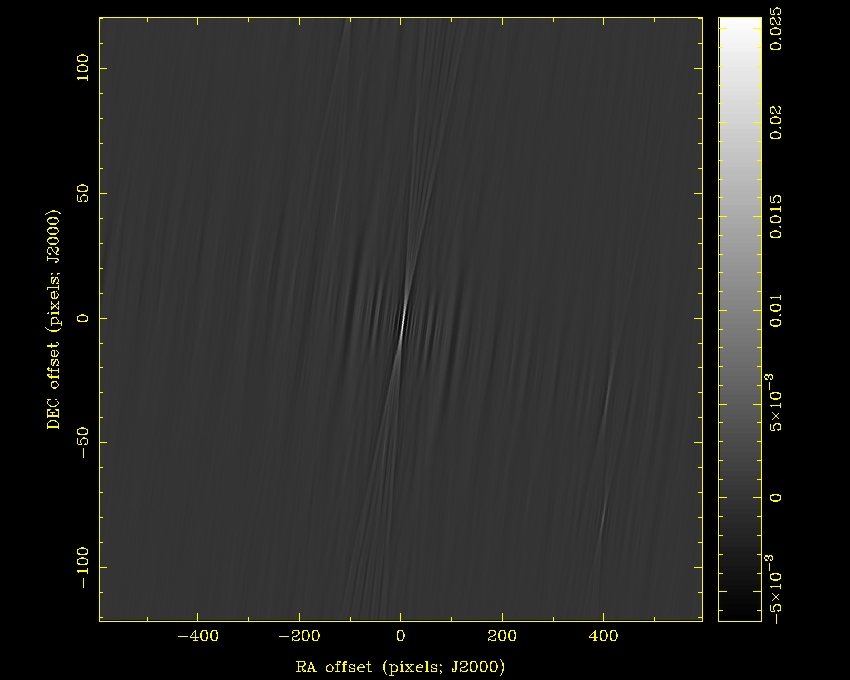

cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 1.383276E-05, 1.383276E-05
Beginning plane   1
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


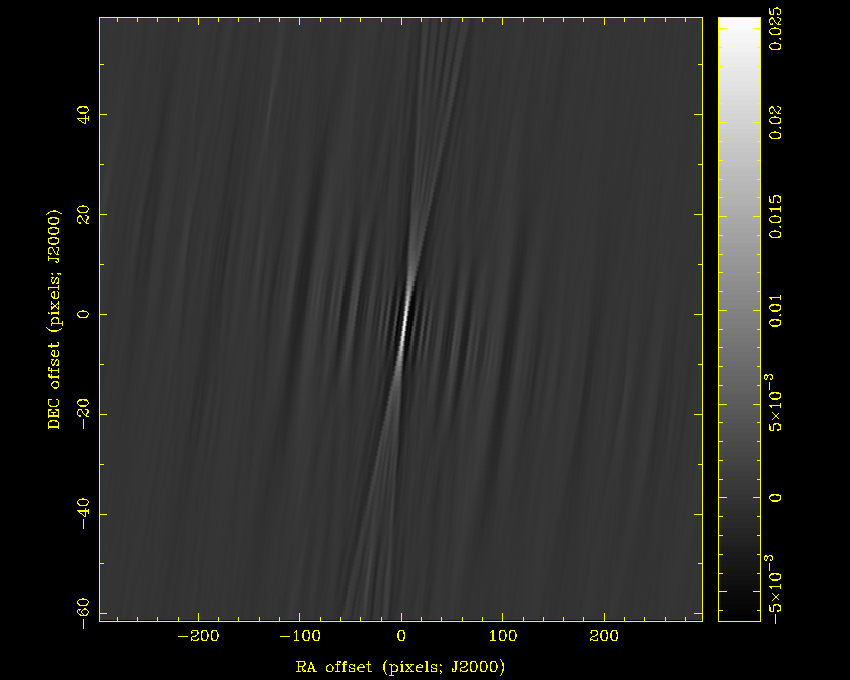

In [39]:
# look at the dirty map


# cgdisp parameters
in_ = freq_chunks[i]+".imap"
beam = freq_chunks[i]+".ibeam"
type_="p"
device="{0}.png/png".format(in_)
laptyp = "/hms,dms"
options="wedge"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,device=device,laptyp=laptyp,
                           options=options)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))

# zoom into the center
region="quarter"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,region=region,device=device,laptyp=laptyp,
                           options=options)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))




In [40]:
# clean parameters
map_ = freq_chunks[i]+".imap"
beam = freq_chunks[i]+".ibeam"
out = freq_chunks[i]+".imodel"
options="negstop,positive"
cutoff=invert_rms
niters="1000"

# remove model if it already exists
!rm -r $out

mir_output = miriad.clean(map=map_,beam=beam,out=out,cutoff=cutoff,niters=niters,
                           options=options)
print(mir_output.decode("utf-8"))


clean: Revision 1.14, 2015/10/29 01:31:02 UTC

Begin iterating
 Clark  Iterations: 17
 Residual min,max,rms:   -1.804E-03   4.450E-03   1.715E-04
 Total CLEANed flux:    2.142E-02
 Clark  Iterations: 382
 Residual min,max,rms:   -8.673E-04   4.990E-04   9.446E-05
 Total CLEANed flux:    5.541E-02
 Clark  Iterations: 1000
 Residual min,max,rms:   -7.678E-04   2.862E-04   8.454E-05
 Total CLEANed flux:    7.402E-02
 Stopping -- Maximum iterations performed


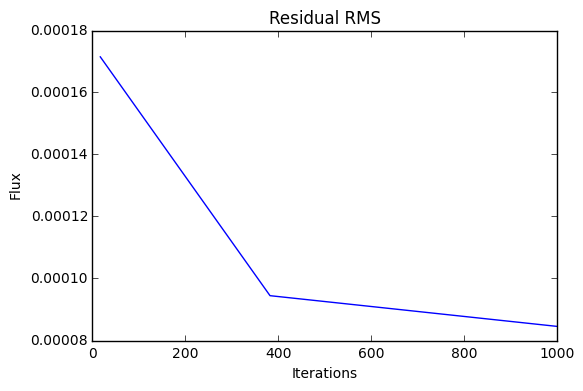

In [41]:
# check if the rms decreases with each iteration
def rmscheck_clean(mir_output):
    tmp = mir_output.decode("utf-8").split("\n")[2:]
    
    min_arr = []
    max_arr = []
    rms_arr = []
    iter_arr = []
    flux_arr = []
    for k, j in enumerate(tmp):
        if 'rms' in j:
            temp = j.split(': ')[-1].split('  ')
            min_arr.append(temp[1])
            max_arr.append(temp[2])
            rms_arr.append(temp[3])
        elif 'Iterations' in j:
            iter_arr.append(j.split(': ')[-1])
        elif 'flux' in j:
            flux_arr.append(j.split(': ')[-1])
    
    # check that the rms is monotonically decreasing
    dx= np.diff(np.asarray(rms_arr,dtype=float))
    all_decreasing = np.all(dx <= 0)
    
    if not all_decreasing:
        culprit = iter_arr[np.argmax(dx>0)]
        print("Warning: RMS values are not monotonically \
              decreasing after {0} iterations".format(culprit))
    
    # get a visual 
    '''
    plt.title("Total Cleaned Flux")
    plt.plot(iter_arr, flux_arr)
    plt.xlabel('Iterations')
    plt.ylabel('Flux')
    plt.show()
    '''
    
    plt.title("Residual RMS")
    #plt.plot(iter_arr, min_arr, label="min")
    #plt.plot(iter_arr, max_arr, label="max")
    plt.plot(iter_arr, rms_arr, label="rms")
    
    if not all_decreasing:
        plt.axvline(x=culprit)
        
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Iterations')
    plt.ylabel('Flux')
    plt.show()

rmscheck_clean(mir_output)    

# I should go back and make these plot better

In [42]:
# restore the image

# restor parameters
model = freq_chunks[i]+".imodel"
beam = freq_chunks[i]+".ibeam"
map_ = freq_chunks[i]+".imap"
out = freq_chunks[i]+".irestor"
mode=""#"residual"

# remove restored image if it already exists
!rm -r $out

mir_output = miriad.restor(model=model,map=map_,beam=beam,out=out, mode=mode)
print(mir_output.decode("utf-8"))


restor: Revision 1.14, 2016/10/06 01:22:40 UTC

Using Gaussian beam fwhm of   69.710 by    2.321 arcsec.
Position angle:   -7.7 degrees.


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'restor':  Zero length value for keyword mode
  warnings.warn(msg)


cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 2.766553E-05, 2.766553E-05
Beginning plane   1
Finding image minimum and maximum
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


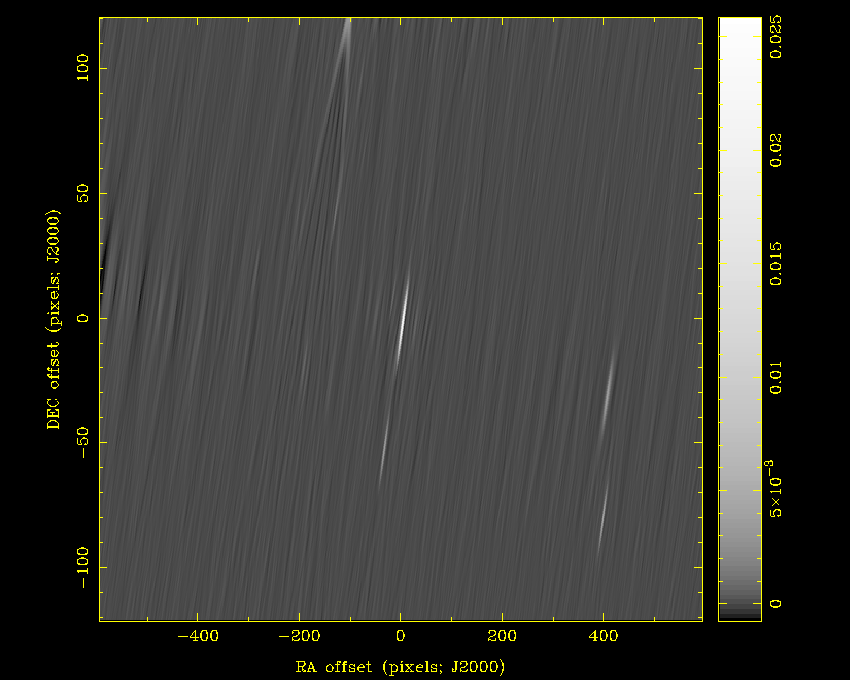

cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 1.383276E-05, 1.383276E-05
Beginning plane   1
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


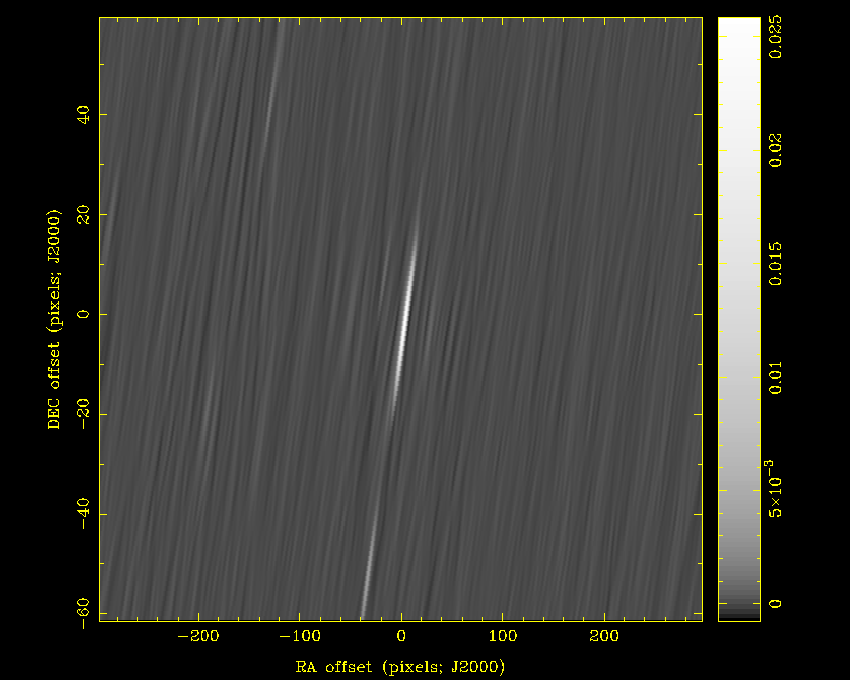

In [43]:
# look at the cleaned image

# cgdisp parameters
in_ = freq_chunks[i]+".irestor"
beam = freq_chunks[i]+".ibeam"
type_="p"
device="{0}.png/png".format(in_)
laptyp = "/hms,dms"
options="wedge"
range_="0,0,log"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))

# zoom into the center
region="quarter"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,region=region,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))





In [44]:
# measure the flux density of the source

# imfit parameters
in_ = freq_chunks[i]+".irestor"
region="quarter"
object_="point"
spar="1,0,0"
out=freq_chunks[i]+".iresidual"
options="residual"

# remove residual image if it already exists
!rm -r $out

mir_output = miriad.imfit(in_=in_,region=region,object=object_,spar=spar, out=out,
                           options=options)
print(mir_output.decode("utf-8"))




imfit: Revision 1.13, 2015/08/07 00:18:50 UTC

-------------------------------------------------
Object 2051-377
RMS residual is 1.49E-04 (theoretical image noise is 8.46E-05)

Using the following beam parameters when
deconvolving and converting to integrated flux
  Beam Major, minor axes (arcsec):    69.71     2.32
  Beam Position angle (degrees):      -7.7

Scaling error estimates by  7.1 to account for
noise correlation between pixels

Source  1, Object type: point
  Peak value:                 2.6534E-02 +/-  2.1784E-04
  Offset Position (arcsec):      -2.653    -8.458
  Positional errors (arcsec):     0.043     0.307
  Pos error ellipse (arcsec):     0.310     0.011    -7.67
  Right Ascension:                20:54:54.177
  Declination:                    -37:33:47.458
-------------------------------------------------


In [45]:
# grab the peak flux value
# returns [peak value, error]
def grabpeak_imfit(mir_output):
    tmp = mir_output.decode("utf-8").split("\n")[2:]
    for k, j in enumerate(tmp):
        if 'Peak' in j:
            temp = j.split(': ')[-1].split(' ')
            ret = [t for t in temp if t !='']
            return(ret[::2])

    
peakflux= grabpeak_imfit(mir_output)

cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 2.766553E-05, 2.766553E-05
Beginning plane   1
Finding image minimum and maximum
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


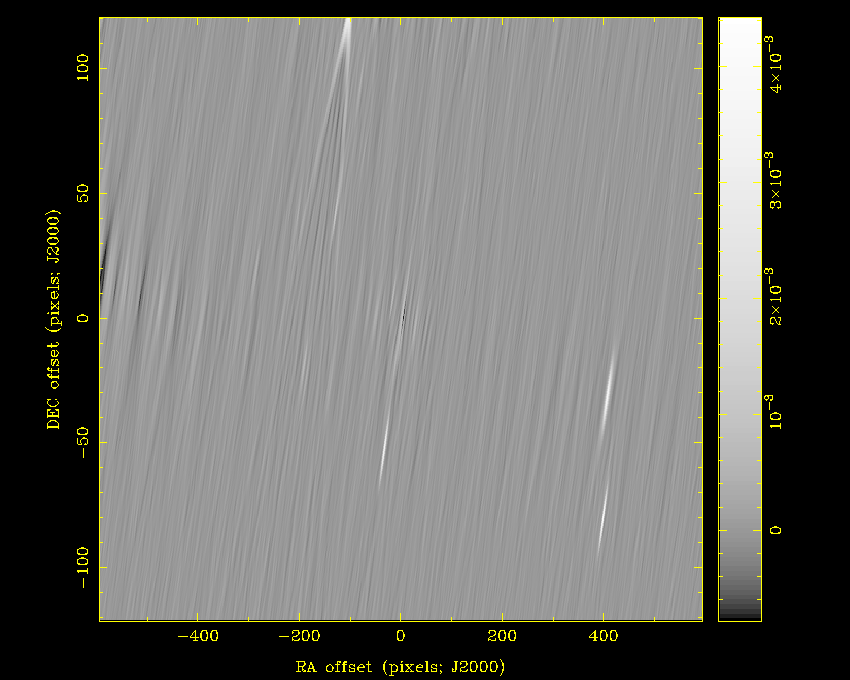

cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 1.383276E-05, 1.383276E-05
Beginning plane   1
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


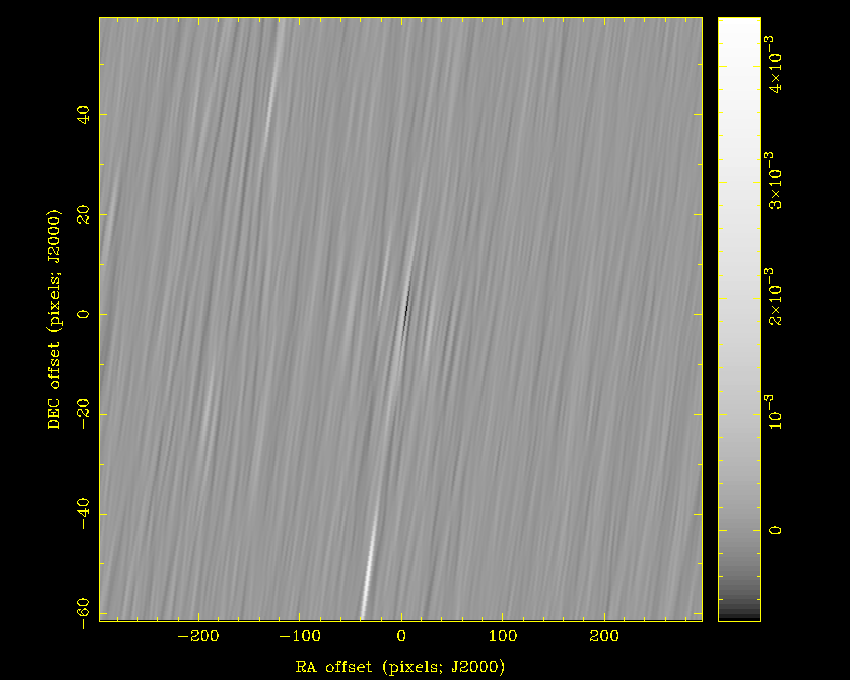

In [46]:

# look at the cleaned image after the central source is subtracted by imfit

# cgdisp parameters
in_ = freq_chunks[i]+".iresidual"
beam = freq_chunks[i]+".ibeam"
type_="p"
device="{0}.png/png".format(in_)
laptyp = "/hms,dms"
options="wedge"
range_="0,0,log"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))

# zoom into the center
region="quarter"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,region=region,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))



imhist: Revision 1.5, 2016/09/13 23:30:14 UTC

IMHIST: imhist: Revision 1.5, 2016/09/13 23:30:14 UTC
***** Histogram of image 2051-377.2868.iresidual *****
      Bounding box: blc=(298,61,1,1), trc=(891,181,1,1)
      Unit of datavalues: JY/BEAM

Histogram information
# of points         Mean            rms            Median between
      71874    8.7132612E-06  1.2331706E-04    -7.9427264E-07 and  4.2806379E-05
Maximum is  3.5701036E-03 at (562,70,1,1) (absolute coordinates)
Minimum is -7.8560598E-04 at (600,123,1,1) (absolute coordinates)


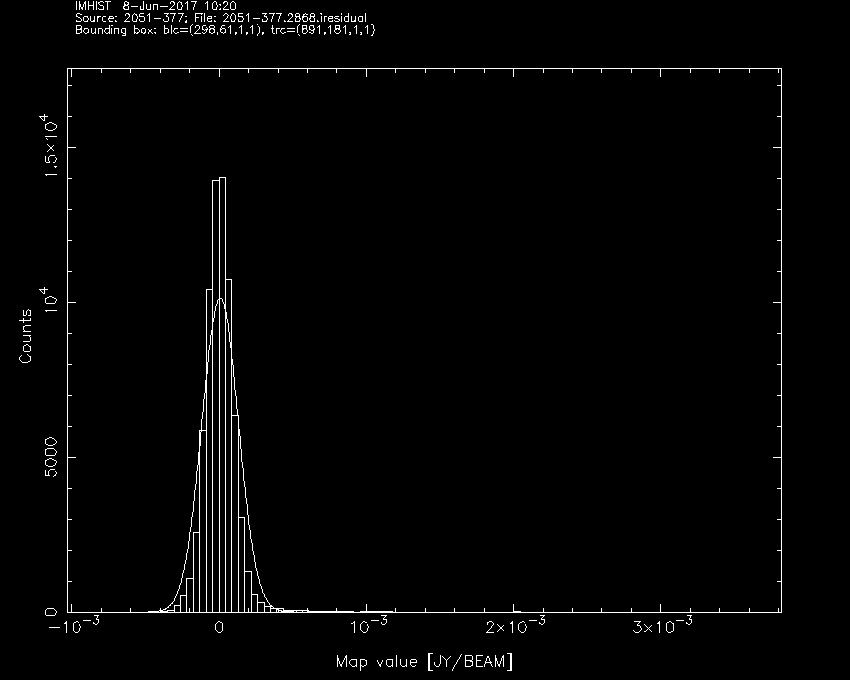

In [47]:
# estimate the dynamic range of the image

# imhist parameters
in_ = freq_chunks[i]+".iresidual"
region="quarter"
device="imhist_{0}.png/png".format(in_)
options="nbin,100"

mir_output = miriad.imhist(in_=in_,region=region, device=device,
                           options=options)
print(mir_output.decode("utf-8"))

display(Image(filename='imhist_{0}.png'.format(in_)))

In [48]:
# grab the peak flux value
# returns [peak value, error]
def grabrms_imhist(mir_output):
    tmp = mir_output.decode("utf-8").split("\n")[2:]
    for k, j in enumerate(tmp):
        if 'rms' in j:
            temp = tmp[k+1].split(' ')
            ret = [t for t in temp if t !='']
            return(ret[2])

    
rms_imhist= grabrms_imhist(mir_output)

dynamic_range = float(peakflux[0])/float(rms_imhist)
print('dynamic range: {0}'.format(round(dynamic_range)))

dynamic range: 215


In [49]:
# find pixel size in arcseconds, multiply them by n

# imlist parameters
in_ = freq_chunks[i]+".iresidual"
options="statistics"

mir_output = miriad.imlist(in_=in_,
                           options=options)
print(mir_output.decode("utf-8"))

# grab the image pixel size
# returns something like [1234,277] for a 1234x277 image
def grabpixels_imlist(mir_output, mult=1):
    tmp = mir_output.decode("utf-8").split("\n")[2:]
    for k, j in enumerate(tmp):
        if 'Trc=' in j:
            temp = j.split('Trc=')[-1].split('(')[-1].split(')')[0].split(',')
            arr = np.asarray([float(temp[0])*mult, float(temp[1])*mult])
            ret = ','.join(str(x) for x in arr)
            return(ret)

# mult = 3 because we're going to do mfclean    
mfclean_imsize = grabpixels_imlist(mir_output, mult=3)

imlist: Revision 1.4, 2013/08/30 01:49:21 UTC

Listing for image 2051-377.2868.iresidual

Image Statistics
  bunit: JY/BEAM  frequency:   2.829950    K/Jy:        944.9669
  Axes: RA---NCP  x DEC--NCP   Beam:  69.71 x   2.32 arcsec
  Bounding region is Blc=(1,1,1),Trc=(1189,242,1)
  Effective beam area:  0.4978E+02 pixels  (Used to normalize total flux)

Axis:     3     FREQ-LSR
 plane   Frequency   Total Flux   Maximum     Minimum     Average       rms
    1   2.82995      4.1796E-02  4.4236E-03 -7.8561E-04  7.2315E-06  1.2684E-04


In [50]:
# find pixel size in arcseconds

# impos parameters
in_ = freq_chunks[i]+".iresidual"
coord="1,1"
type_="abspix"

mir_output = miriad.impos(in_=in_, coord=coord, type=type_)
print(mir_output.decode("utf-8"))

# grab the pixelsize in arcseconds
# returns "x,x"
def grabpixelsize_impos(mir_output):
    tmp = mir_output.decode("utf-8").split("\n")[2:]
    arc_arr = []
    pix_arr = []
    for k, j in enumerate(tmp):
        if 'arcsec' in j:
            temp = j.split('=')[-1].split(' ')
            ret = [t for t in temp if t !='']
            arc_arr.append(float(ret[0]))
        if 'Offset pixels' in j:
            for m in [1,2]:
                temp = tmp[k+m].split('=')[-1]
                pix_arr.append(float(temp))
            
    pixel_size = np.abs(np.divide(arc_arr,pix_arr))
    pixel_size = ','.join("{0:.2f}".format(x) for x in pixel_size)
    return(pixel_size)

mfclean_cellsize = grabpixelsize_impos(mir_output)

impos: Revision 1.16, 2015/07/31 01:20:50 UTC

World coordinates
Axis 1: RA---NCP =  20:55:37.702
Axis 2: DEC--NCP = -37:42:11.85

Offset world coordinates
Axis 1: RA---NCP =   5.14888131E+02 arcsec
Axis 2: DEC--NCP =  -5.12851490E+02 arcsec

Absolute pixels
Axis 1: RA---NCP =   1.00
Axis 2: DEC--NCP =   1.00

Offset pixels
Axis 1: RA---NCP = -594.00
Axis 2: DEC--NCP = -121.00

Nearest pixel = 1,1.  Value =  1.339744E-05 JY/BEAM


In [51]:
# prep for multifrequency clean

# invert parameters
vis = freq_chunks[i]
map_ = freq_chunks[i]+".mf.imap"
beam = freq_chunks[i]+".mf.ibeam"
imsize = mfclean_imsize
cell = mfclean_cellsize
sup="0"
stokes = "i"
options="mfs,sdb"

# delete the files if they already exist
!rm -r $map_
!rm -r $beam

mir_output = miriad.invert(vis=vis,map=map_,beam=beam,imsize=imsize,
                           cell=cell, sup=sup, stokes=stokes,options=options)
print(mir_output.decode("utf-8"))
    
invert_rms = grabrms_invert(mir_output)




invert: Revision 1.22, 2016/01/20 03:03:49 UTC

Reading the visibility data ...
Making MFS images
Visibilities accepted: 1441335
Mean Frequency(GHz):     2.83
Sidelobe suppression area is 1x4 arcsec
 ... this corresponds to natural weighting
Applying the weights ...
Theoretical rms noise: 7.800E-05
Forming the beam ...
Forming Stokes I  image ...
Completed 100% !


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'invert':  Visibilities rejected: 755145
  warnings.warn(msg)


cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 7.392482E-05, 8.267953E-05
Beginning plane   1
Finding image minimum and maximum
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


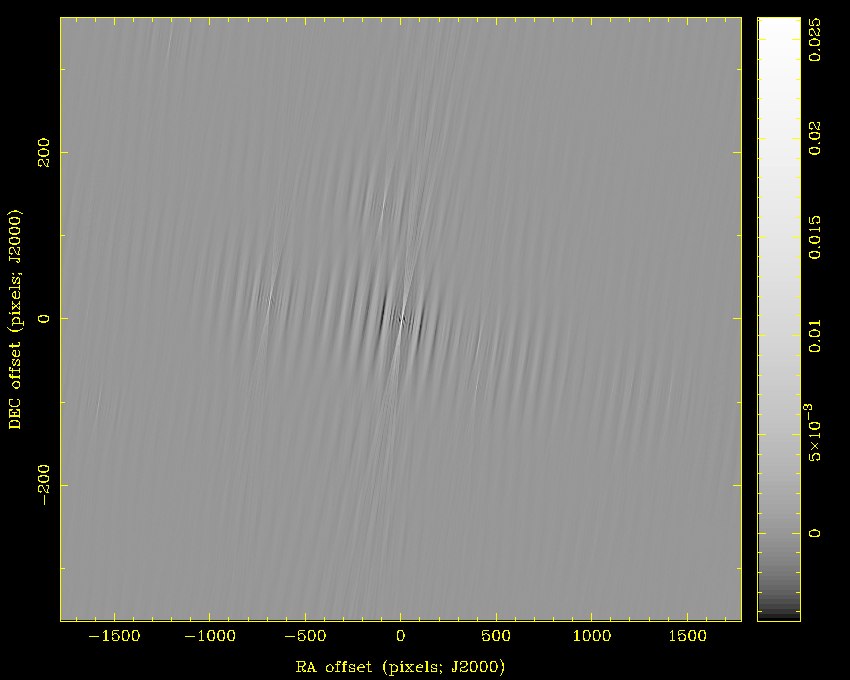

cgdisp: Revision 1.27, 2015/07/09 23:25:48 UTC

Character sizes (axes & velocity) are: 1.0, 1.0
Linear x and y scales per mm = 3.695205E-05, 4.133976E-05
Beginning plane   1
Tabulating linear black and white table


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'cgdisp':  KeyFin: Parameter laptyp not used or not exhausted
 KeyFin: Parameter beam not used or not exhausted
  warnings.warn(msg)


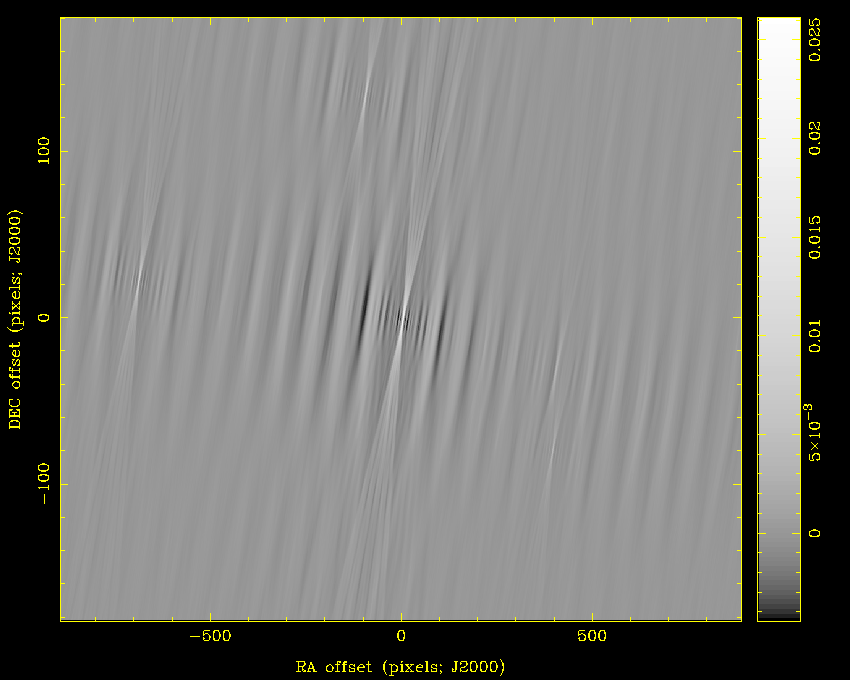

In [52]:

# look at the dirty map pre-mfclean

# cgdisp parameters
in_ = freq_chunks[i]+".mf.imap"
beam = freq_chunks[i]+"mf.ibeam"
type_="p"
device="{0}.png/png".format(in_)
laptyp = "/hms,dms"
options="wedge,unequal"
range_="0,0,log"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))

# zoom into the center
region="quarter"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,region=region,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))




In [53]:
# mfclean enough to get regions

# mfclean parameters
map_ = freq_chunks[i]+".mf.imap"
beam = freq_chunks[i]+".mf.ibeam"
out = freq_chunks[i]+".mf.imodel"
options="negstop,positive"
cutoff=invert_rms
niters="1000"
region='quarter'

# remove model if it already exists
!rm -r $out

mir_output = miriad.mfclean(map=map_,beam=beam,out=out,cutoff=cutoff,niters=niters,
                           options=options,region=region)
print(mir_output.decode("utf-8"))

# make sure the rms decreases with each iteration
rmscheck_clean(mir_output)


# restore the image

# restor parameters
model = freq_chunks[i]+".mf.imodel"
beam = freq_chunks[i]+".mf.ibeam"
map_ = freq_chunks[i]+".mf.imap"
out = freq_chunks[i]+".mf.irestor"
mode=""#"residual"

# remove restored image if it already exists
!rm -r $out

mir_output = miriad.restor(model=model,map=map_,beam=beam,out=out, mode=mode)
print(mir_output.decode("utf-8"))





rm: 2051-377.2868.mf.imodel: No such file or directory


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/mirpy/wrapper.py:83: UserWarning: 'mfclean':  KeyFin: Parameter options not used or not exhausted
 Sub-beam size is too small
  warnings.warn(msg)


MiriadError: Specify a smaller region to be cleaned


In [ ]:
# get regions to mfclean further

# cgcurs parameters
in_ = freq_chunks[i]+".mf.irestor"
type_ = 'p'
range_ ="0,0,log"
device = "/xs"
labtyp="hms,dms"
options="region"


mir_output = miriad.cgcurs(in_=in_, type=type_, range=range_,device=device,labtyp=labtyp,
                           options=options)
#print(mir_output.decode("utf-8"))


In [ ]:
# mfclean with new regions

# mfclean parameters
map_ = freq_chunks[i]+".mf.imap"
beam = freq_chunks[i]+".mf.ibeam"
out = freq_chunks[i]+".mf.imodel"
options="negstop,positive"
cutoff=invert_rms
niters="100000"
region="@cgcurs.region"

# remove model if it already exists
!rm -r $out

mir_output = miriad.mfclean(map=map_,beam=beam,out=out,cutoff=cutoff,niters=niters,
                           options=options,region=region)
print(mir_output.decode("utf-8"))

# make sure the rms decreases with each iteration
rmscheck_clean(mir_output)


# restore the image

# restor parameters
model = freq_chunks[i]+".mf.imodel"
beam = freq_chunks[i]+".mf.ibeam"
map_ = freq_chunks[i]+".mf.imap"
out = freq_chunks[i]+".mf.irestor"
mode=""#"residual"

# remove restored image if it already exists
!rm -r $out

mir_output = miriad.restor(model=model,map=map_,beam=beam,out=out, mode=mode)
print(mir_output.decode("utf-8"))




# look at the cleaned image

# cgdisp parameters
in_ = freq_chunks[i]+".mf.irestor"
beam = freq_chunks[i]+"mf.ibeam"
type_="p"
device="{0}.png/png".format(in_)
laptyp = "/hms,dms"
options="wedge,unequal"
range_="0,0,log"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))

# zoom into the center
region="quarter"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,region=region,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))





In [ ]:
# self calibration

# selfcal parameters
vis = freq_chunks[i]
model=vis+".mf.imodel"
clip= "0.013"
interval=1
options="phase,mfs"

mir_output = miriad.selfcal(vis=vis,model=model,clip=clip,interval=interval,
                           options=options)
print(mir_output.decode("utf-8"))

In [ ]:
# prep for multifrequency clean after selfcal

# invert parameters
vis = freq_chunks[i]
map_ = freq_chunks[i]+".mf.imap"
beam = freq_chunks[i]+".mf.ibeam"
imsize = mfclean_imsize
cell = mfclean_cellsize
sup="0"
stokes = "i"
options="mfs,sdb"

# delete the files if they already exist
!rm -r $map_
!rm -r $beam

mir_output = miriad.invert(vis=vis,map=map_,beam=beam,imsize=imsize,
                           cell=cell, sup=sup, stokes=stokes,options=options)
print(mir_output.decode("utf-8"))
    
invert_rms = grabrms_invert(mir_output)


# mfclean with regions and self cal

# mfclean parameters
map_ = freq_chunks[i]+".mf.imap"
beam = freq_chunks[i]+".mf.ibeam"
out = freq_chunks[i]+".mf.imodel"
options="negstop,positive"
cutoff=invert_rms
niters="10000"
region="@cgcurs.region"

# remove model if it already exists
!rm -r $out

mir_output = miriad.mfclean(map=map_,beam=beam,out=out,cutoff=cutoff,niters=niters,
                           options=options,region=region)
print(mir_output.decode("utf-8"))

# make sure the rms decreases with each iteration
rmscheck_clean(mir_output)


# restore the image

# restor parameters
model = freq_chunks[i]+".mf.imodel"
beam = freq_chunks[i]+".mf.ibeam"
map_ = freq_chunks[i]+".mf.imap"
out = freq_chunks[i]+".mf.irestor"
mode=""#"residual"

# remove restored image if it already exists
!rm -r $out

mir_output = miriad.restor(model=model,map=map_,beam=beam,out=out, mode=mode)
print(mir_output.decode("utf-8"))


# look at the cleaned, selfcal'ed image

# cgdisp parameters
in_ = freq_chunks[i]+".mf.irestor"
beam = freq_chunks[i]+"mf.ibeam"
type_="p"
device="{0}.png/png".format(in_)
laptyp = "/hms,dms"
options="wedge,unequal"
range_="0,0,log"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))

# zoom into the center
region="quarter"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,region=region,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))


In [ ]:
# measure the flux density of the source

# imfit parameters
in_ = freq_chunks[i]+".mf.irestor"
region="quarter"
object_="point"
spar="1,0,0"
out=freq_chunks[i]+".mf.iresidual"
options="residual"

# remove residual image if it already exists
!rm -r $out

mir_output = miriad.imfit(in_=in_,region=region,object=object_,spar=spar, out=out,
                           options=options)
print(mir_output.decode("utf-8"))

peakflux= grabpeak_imfit(mir_output)

# look at the cleaned image after the central source is subtracted by imfit

# cgdisp parameters
in_ = freq_chunks[i]+".iresidual"
beam = freq_chunks[i]+".ibeam"
type_="p"
device="{0}.png/png".format(in_)
laptyp = "/hms,dms"
options="wedge"
range_="0,0,log"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))

# zoom into the center
region="quarter"

mir_output = miriad.cgdisp(in_=in_,beam=beam,type=type_,region=region,device=device,laptyp=laptyp,
                           options=options,range=range_)
print(mir_output.decode("utf-8"))
display(Image(filename='{0}.png'.format(in_)))


# check the residual flux distribtion

# imhist parameters
in_ = freq_chunks[i]+".mf.iresidual"
region="quarter"
device="imhist_{0}.png/png".format(in_)
options="nbin,100"

mir_output = miriad.imhist(in_=in_,region=region, device=device,
                           options=options)
print(mir_output.decode("utf-8"))

display(Image(filename='imhist_{0}.png'.format(in_)))
 
# estimate the dynamic range of the image
rms_imhist= grabrms_imhist(mir_output)
dynamic_range = float(peakflux[0])/float(rms_imhist)
print('dynamic range: {0}'.format(round(dynamic_range)))


In [54]:
print(plot)

2058-425.2100realimag.png


In [ ]:
"""# clear directory so you can start all over
!rm -r *2051*, *.2100, cx208_2011-04-28.uv
!rm cgcurs.region
"""


In [ ]:
# read about clean algorithm
# https://archive.lib.msu.edu/crcmath/math/math/c/c368.htm
# this has some good visuals
# https://www.astron.nl/astrowiki/lib/exe/fetch.php?media=ra_uva:ra_uva_lecture8.pdf 


In [ ]:
# Now trying miriad-python from 
# Williams et al., 2012 PASP 124 624 (doi:10.1086/666604)
#"work on miriad-python was initially inspired by 
# a practical desire for more efficient scripting of MIRIAD
# reductions""

"""
MIRIAD is not a
monolithic project: there are at least two nontrivially divergent
codebases maintained for use with the ATCA and
CARMA, with some sharing of modifications between
the them. miriad-python is referenced to the CARMA
MIRIAD codebase

Although miriadpython
offers very different APIs and new features, we
concieve of it as fundamentally a layer above MIRIAD
and not a standalone package:

miriad-python must be compiled against MIRIAD
libraries from the CARMA codebase built with the autoconf-based
build system

"""